In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [84]:
data=pd.read_csv("watertret1.csv")
data.head()
columns= data.columns

In [71]:
data.iloc[:,0]

0       D-1/3/90
1       D-2/3/90
2       D-4/3/90
3       D-5/3/90
4       D-6/3/90
         ...    
522    D-26/8/91
523    D-27/8/91
524    D-28/8/91
525    D-29/8/91
526    D-30/8/91
Name: N. Attrib., Length: 527, dtype: object

#  Heatmap for correlation

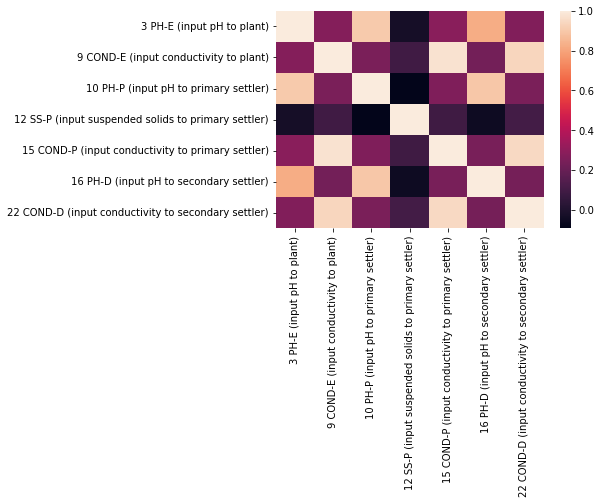

In [80]:
import seaborn as sns
sns.heatmap(data.corr());


In [86]:
data.iloc[:,0]=data.iloc[:,0].astype('category')
data.iloc[:,0]=data.iloc[:,0].cat.codes

# data cleaning replaced '?' with 0 

In [87]:
data = data.replace('?',0)

# Standardisation

In [48]:
scaler = StandardScaler()
data1 = scaler.fit_transform(data)

In [49]:
data1

array([[-1.68275448,  0.86754314, -0.30808658, ...,  0.2803088 ,
        -0.02302   ,  0.26748153],
       [-0.42726188,  0.32684151,  0.23840156, ...,  0.28566146,
         0.33011148,  0.28435117],
       [ 1.08458785, -0.39682751,  0.96705241, ...,  0.087613  ,
         0.07997669,  0.22109   ],
       ...,
       [ 0.65732597, -0.32302286, -0.74527709, ...,  0.1571976 ,
         0.0946905 ,  0.24217706],
       [ 0.76907138, -0.40098102, -0.74527709, ...,  0.68711103,
         0.13883193,  0.27591635],
       [ 0.97284243, -0.5822444 , -0.77806637, ...,  0.40342   ,
        -0.08923215, -3.9330604 ]])

In [50]:
model = KMeans(n_clusters=5)
model.fit(data1)

KMeans(n_clusters=5)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


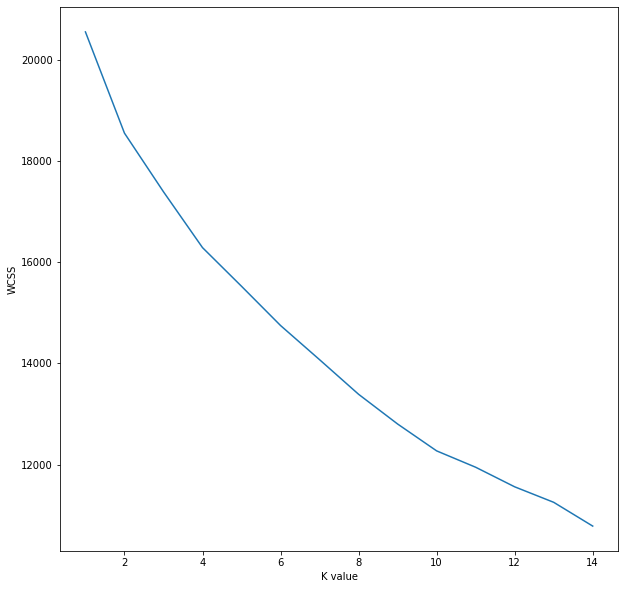

In [51]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(data1)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

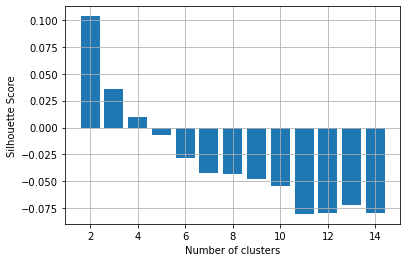

In [52]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(data1, KMeans(n_clusters = n_cluster).fit_predict(data))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 


# Best model at k = 2 from elbow method

In [53]:
best_model = KMeans(n_clusters=2)
best_model.fit(data)

KMeans(n_clusters=2)

In [54]:
label = best_model.fit_predict(data)

In [55]:
label_0 = data[label == 0]
label_1 = data[label == 1]

In [88]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data)
data["label"] = cluster


In [89]:
data.label.value_counts()

0    506
1     21
Name: label, dtype: int64

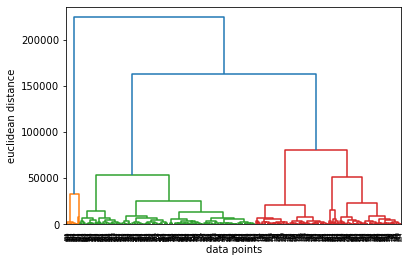

In [90]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [92]:
data.head()

,N. Attrib.,1 Q-E (input flow to plant),2 ZN-E (input Zinc to plant),3 PH-E (input pH to plant),4 DBO-E (input Biological demand of oxygen to plant),5 DQO-E (input chemical demand of oxygen to plant),6 SS-E (input suspended solids to plant),7 SSV-E (input volatile supended solids to plant),8 SED-E (input sediments to plant),9 COND-E (input conductivity to plant),...,30 RD-DBO-P (performance input Biological demand of oxygen in primary settler),31 RD-SS-P (performance input suspended solids to primary settler),32 RD-SED-P (performance input sediments to primary settler),33 RD-DBO-S (performance input Biological demand of oxygen to secondary settler),34 RD-DQO-S (performance input chemical demand of oxygen to secondary settler),35 RD-DBO-G (global performance input Biological demand of oxygen),36 RD-DQO-G (global performance input chemical demand of oxygen),37 RD-SS-G (global performance input suspended solids),38 RD-SED-G (global performance input sediments),label
0,7,44101,1.5,7.8,0,407,166,66.3,4.5,2110,...,0,58.8,95.5,0,70,0,79.4,87.3,99.6,0
1,198,39024,3,7.7,0,443,214,69.2,6.5,2660,...,0,60.7,94.8,0,80.8,0,79.5,92.1,100,0
2,428,32229,5,7.6,0,528,186,69.9,3.4,1666,...,0,58.2,95.6,0,52.9,0,75.8,88.7,98.5,0
3,444,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100,0
4,462,36924,1.5,8.0,242,496,176,64.8,4,2110,...,0,62.7,95.6,0,71,92.1,78.2,87.5,99.5,0


In [93]:
data.to_excel('out.xlsx')

In [98]:
data['30 RD-DBO-P (performance input Biological demand of oxygen in primary settler)'].describe()

count     527
unique    315
top         0
freq       62
Name: 30 RD-DBO-P (performance input Biological demand of oxygen in primary settler), dtype: int64